# Exploratory Data Analysis (EDA)

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [22]:
book = pd.read_csv('../data/book_data_cleaned_forPowerBI.csv')

In [23]:
book.head()

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link,discount,revenue
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,4.10,2.46,53075,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.4,130564.50
1,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,3.27,2.28,7929,Sách tư duy - Kỹ năng sống,780,4.8,184,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/d7/99/24/1...,0.3,18078.12
2,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,7.98,4.79,17896,Lĩnh vực khác,3623,4.8,430,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/8d/96/9e/c...,0.4,85721.84
3,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,3.00,1.80,24668,Tác phẩm kinh điển,5131,5.0,228,Nhà Xuất Bản Hà Nội,https://salt.tikicdn.com/ts/product/45/3b/fc/a...,0.4,44402.40
4,147920903,Một Thoáng Ta Rực Rỡ Ở Nhân Gian,Unknown,5.13,3.08,10000,Tiểu Thuyết,1636,4.8,304,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/2f/b5/4e/a...,0.4,30800.00


## Sales Analyst

### 1. Tổng quan thị trường sách Tiki

In [24]:
print(f"Tổng số đầu sách: {book['product_id'].nunique()}")
print(f"Tổng số tác giả: {book['authors'].nunique()}")
print(f"Tổng số NXB: {book['manufacturer'].nunique()}")
print(f"Tổng số lượng sách bán ra: {book['quantity'].sum():,.0f}")
print(f"Tổng doanh thu: ${book['revenue'].sum():,.2f} (USD)")
print(f"Doanh thu trung bình trên mỗi đầu sách: ${book['revenue'].mean():,.2f} (USD)")

Tổng số đầu sách: 1731
Tổng số tác giả: 1064
Tổng số NXB: 42
Tổng số lượng sách bán ra: 4,844,002
Tổng doanh thu: $19,912,205.43 (USD)
Doanh thu trung bình trên mỗi đầu sách: $11,503.30 (USD)


### 2. Top 10 cuốn sách bán chạy nhất 

TOP 10 SÁCH BÁN CHẠY NHẤT:


,title,quantity,authors,current_price,category
0,OSHO - Yêu - Being In Love,"671,121",Osho,4.21,Sách nghệ thuật sống đẹp
1,"Nóng Giận Là Bản Năng , Tĩnh Lặng Là Bản Lĩnh","65,623",Tống Mặc,2.17,Sách tư duy - Kỹ năng sống
2,Khi Hơi Thở Hóa Thinh Không,"59,734",Paul Kalanithi,2.61,Tiểu sử - Hồi ký
3,Cây Cam Ngọt Của Tôi,"53,075",José Mauro de Vasconcelos,2.46,Tiểu Thuyết
4,Đàn Ông Sao Hỏa Đàn Bà Sao Kim,"48,419",John Gray,5.14,Sách tư duy - Kỹ năng sống
5,Dám Bị Ghét,"45,858",Koga Fumitake,2.19,Tiểu Thuyết
6,Muôn Kiếp Nhân Sinh (Many Lives - Many Times),"45,110",Nguyên Phong,4.21,Muôn Kiếp Nhân Sinh (Many Lives - Many Times)
7,Bước Chậm Lại Giữa Thế Gian Vội Vã (Tái Bản),"44,869",Hae Min,1.94,Truyện ngắn - Tản văn - Tạp Văn
8,Đời Ngắn Đừng Ngủ Dài (Tái Bản),"44,164",Robin Sharma,2.11,Sách tư duy - Kỹ năng sống
9,Chờ Đến Mẫu Giáo Thì Đã Muộn,"36,933",Ibuka Masaru,2.09,Sách Làm Cha Mẹ


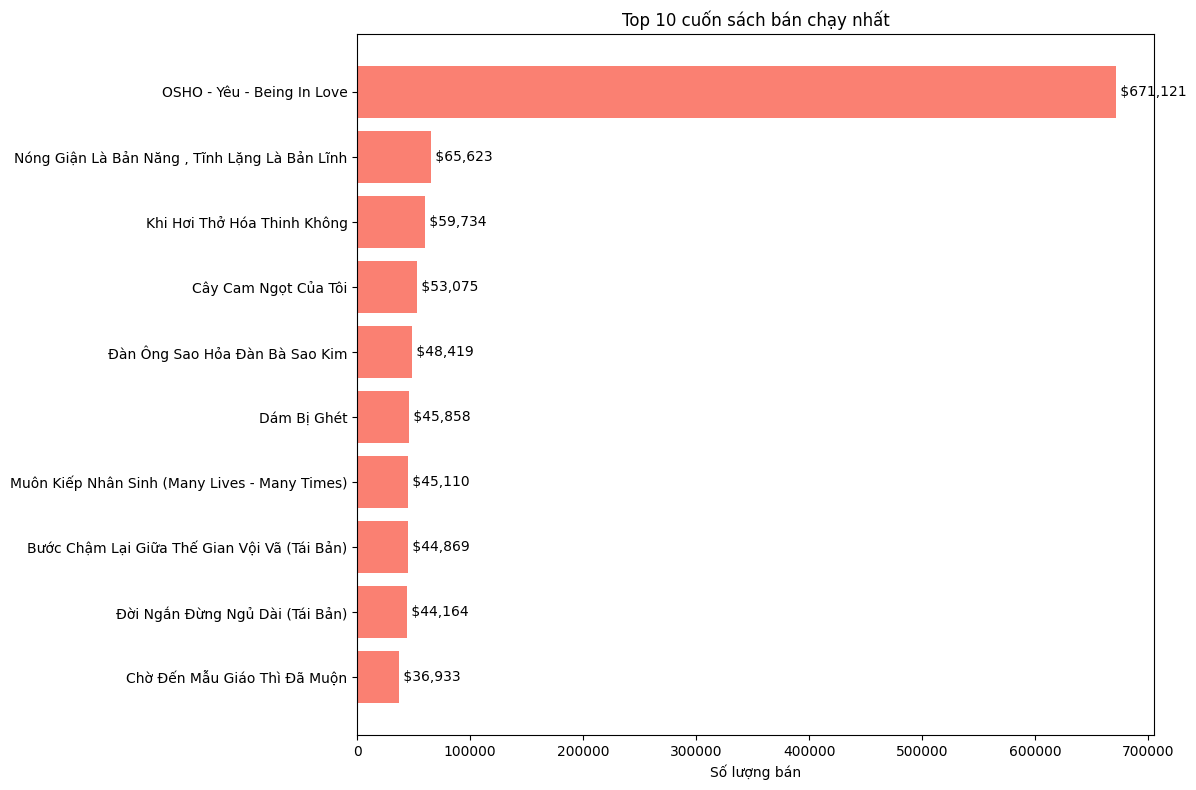

In [25]:
top_10_books_sales_well = book.nlargest(10, 'quantity')[['title','quantity', 'authors', 'current_price', 'category']].reset_index(drop=True)
top_10_books_sales_well['quantity'] = top_10_books_sales_well['quantity'].map('{:,.0f}'.format)
print("TOP 10 SÁCH BÁN CHẠY NHẤT:")
display(top_10_books_sales_well)

# Biểu đồ 
chart_data = book.nlargest(10, 'quantity')[['title', 'quantity']].reset_index(drop=True)

plt.figure(figsize=(12, 8))
plt.barh(chart_data['title'], chart_data['quantity'], color='salmon')

for i, v in enumerate(chart_data['quantity']):
    plt.text(v, i, f' ${v:,.0f}', va='center')

plt.xlabel('Số lượng bán')
plt.title('Top 10 cuốn sách bán chạy nhất')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Những cuốn sách về kỹ năng sống, self-help chiếm đa số trong top 10 sách bán chạy nhất cho thấy đây là các cuốn sách được ưa chuộn nhất

### 3. Top 10 cuốn sách có doanh thu cao nhất

TOP 10 SÁCH THEO DOANH THU (REVENUE)


,title,revenue,quantity,authors,current_price,category
0,OSHO - Yêu - Being In Love,"2,825,419.41",671121,Osho,4.21,Sách nghệ thuật sống đẹp
1,Boxset Harry Potter - Tiếng Việt (Trọn Bộ 7 Tập),"436,027.20",9562,J. K. Rowling,45.60,Truyện Giả tưởng - Huyền Bí - Phiêu Lưu
2,Bộ sách Làm Giàu Từ Chứng Khoán (How To Make M...,"389,849.60",14656,William J. O’Neil,26.60,"Sách tài chính, tiền tệ"
3,Payback Time - Ngày Đòi Nợ,"354,818.24",31234,Phil Town,11.36,Bài học kinh doanh
4,Đàn Ông Sao Hỏa Đàn Bà Sao Kim,"248,873.66",48419,John Gray,5.14,Sách tư duy - Kỹ năng sống
5,Luật Tâm Thức - Giải Mã Ma Trận Vũ Trụ,"234,381.84",27672,Ngô Sa Thạch,8.47,Lĩnh vực khác
6,Tuyệt kỹ Giao dịch bằng đồ thị nến Nhật – Japa...,"231,217.20",12195,Steve Nison,18.96,"Sách tài chính, tiền tệ"
7,Muôn Kiếp Nhân Sinh (Many Lives - Many Times),"189,913.10",45110,Nguyên Phong,4.21,Muôn Kiếp Nhân Sinh (Many Lives - Many Times)
8,Cuốn Sách Hoàn Hảo Về Ngôn Ngữ Cơ Thể - Body L...,"184,159.60",30490,Allan & Barbara Pease,6.04,Sách tư duy - Kỹ năng sống
9,Thiết Kế Cuộc Đời Thịnh Vượng - Design a Prosp...,"176,886.56",15571,Thái Phạm,11.36,Sách tư duy - Kỹ năng sống


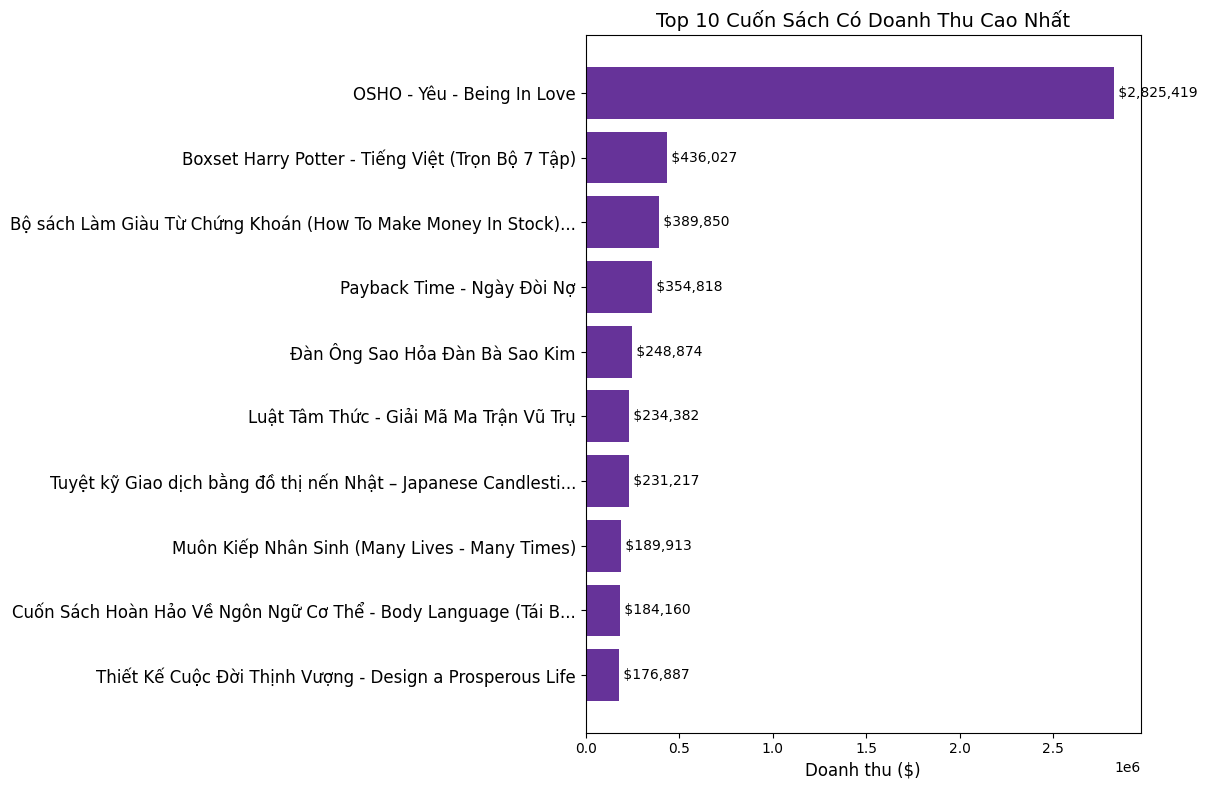

In [26]:
top_10_book_revenue = book.nlargest(10, 'revenue')[['title','revenue','quantity', 'authors', 'current_price', 'category']].reset_index(drop=True)
top_10_book_revenue['revenue'] = top_10_book_revenue['revenue'].map('{:,.2f}'.format)
print("TOP 10 SÁCH THEO DOANH THU (REVENUE)")
display(top_10_book_revenue)

# Biểu đồ - Tạo chart_data theo REVENUE
chart_data = book.nlargest(10, 'revenue')[['title', 'revenue']].reset_index(drop=True)

plt.figure(figsize=(12, 8))
plt.barh(range(len(chart_data)), chart_data['revenue'], color='rebeccapurple')

# Rút gọn tên sách nếu quá dài (giới hạn 60 ký tự)
short_titles = [title[:60] + '...' if len(title) > 60 else title for title in chart_data['title']]
plt.yticks(range(len(chart_data)), short_titles, fontsize=12)

for i, v in enumerate(chart_data['revenue']):
    plt.text(v, i, f' ${v:,.0f}', va='center', fontsize=10)

plt.xlabel('Doanh thu ($)', fontsize=12)
plt.title('Top 10 Cuốn Sách Có Doanh Thu Cao Nhất', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


- Cuốn “OSHO – Yêu: Being In Love” có doanh thu cao nhất (≈ 2.82 triệu USD), mặc dù giá bán chỉ có (4.21 USD), cuốn sách này xuất hiện ở cả 2 top bán chạy và doanh thu cao nhất có vẻ cuốn sách này khá hay
- Bộ sách "Boxset Harry Potter - Tiếng Việt (Trọn Bộ 7 Tập)" có doanh thu cao thứ hai là (≈ 436,027.20 nghìn USD), giá bán là (45.60 USD), nhưng chia ra cho 7 cuốn thì chỉ có tầm (6,51 USD) một cuốn
- Các cuốn sách về tài chính, tiền tệ, kinh doanh có giá trung bình khá cao, là những phân khúc sách cao cấp


### 4. Top 10 thể loại sách có danh thu cao nhất 

TOP 10 THỂ LOẠI SÁCH CÓ DOANH THU CAO NHẤT:


,category,revenue
0,Sách tư duy - Kỹ năng sống,"$3,599,021.21"
1,Sách nghệ thuật sống đẹp,"$3,179,522.23"
2,"Sách tài chính, tiền tệ","$1,563,891.36"
3,Bài học kinh doanh,"$1,120,258.02"
4,Tiểu Thuyết,"$1,099,431.28"
5,Truyện ngắn - Tản văn - Tạp Văn,"$1,000,352.24"
6,Sách kỹ năng làm việc,"$718,457.40"
7,Truyện Giả tưởng - Huyền Bí - Phiêu Lưu,"$628,107.97"
8,Sách Học Tiếng Anh,"$557,912.65"
9,Truyện dài,"$508,914.40"


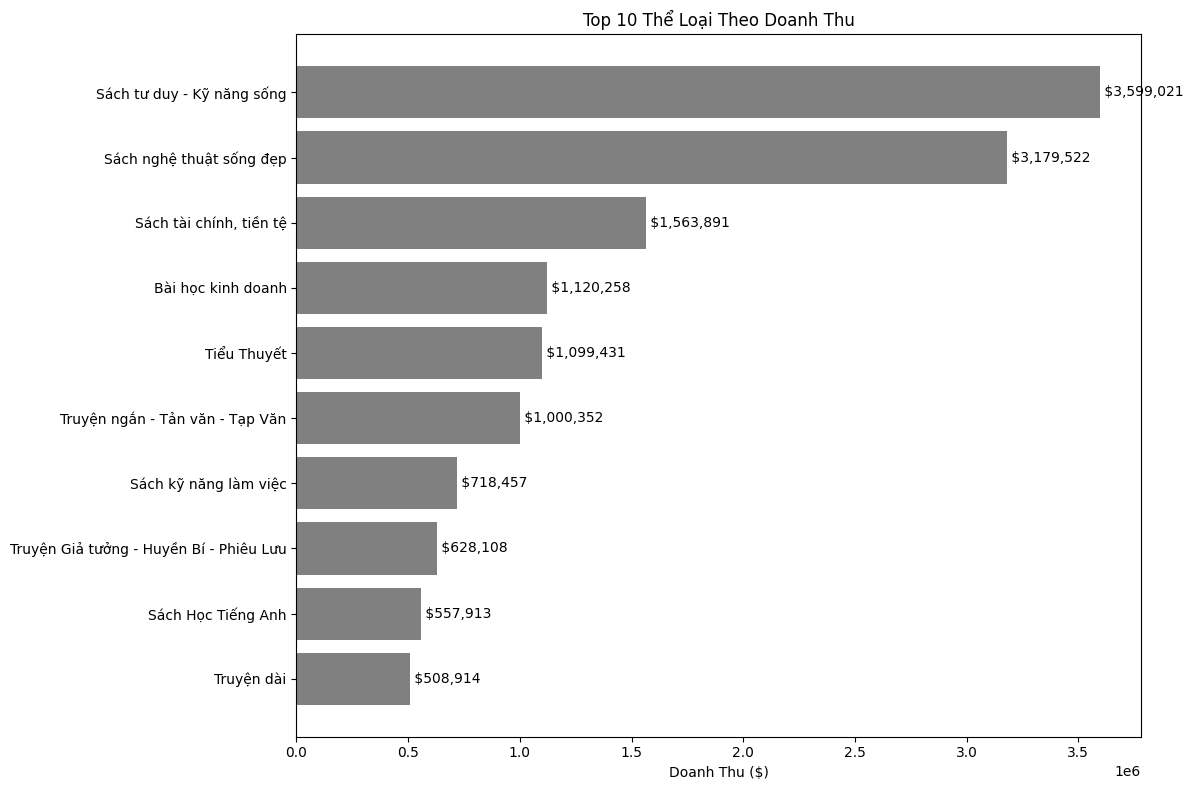

In [27]:
top_10_category_revenue = book.groupby('category')['revenue'].sum().reset_index()
top_10_category_revenue = top_10_category_revenue.sort_values('revenue', ascending=False).head(10)
top_10_category_revenue = top_10_category_revenue.reset_index(drop=True)  
top_10_category_revenue['revenue'] = top_10_category_revenue['revenue'].map('${:,.2f}'.format)

print("TOP 10 THỂ LOẠI SÁCH CÓ DOANH THU CAO NHẤT:")
display(top_10_category_revenue)

chart_data = book.groupby('category')['revenue'].sum().reset_index()
chart_data = chart_data.sort_values('revenue', ascending=False).head(10)


## visualization
plt.figure(figsize=(12, 8))
plt.barh(chart_data['category'], chart_data['revenue'], color='gray')

# Thêm số
for i, v in enumerate(chart_data['revenue']):
    plt.text(v, i, f' ${v:,.0f}', va='center')

plt.xlabel('Doanh Thu ($)')
plt.title('Top 10 Thể Loại Theo Doanh Thu')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Top 1 và 2 bỏ xa các thể loại còn lại nên ở insight này ta sẽ phân tích về 2 thể loại trên
- Sách tư duy - Kỹ năng sống = $3,599,021.21, thể loại này không có cuốn nào nằm trong top 10 sách theo doanh thu nhưng lại dẫn đầu về tổng thể loại cho thấy độ ổn định và bán chạy liên tục
- Sách nghệ thuật sống đẹp = $3,179,522.23, rất cao nhưng doanh thu của sách OSHO - Yêu - Being In Love	= $2,825,419.41  ≈ **88.9%** nếu cuốn này giảm thiệt khả năng cao thể loại này sẽ rớt hạng

=>> Đầu tư vào loại Sách tư duy - Kỹ năng sống vì tính ổn định trong doanh thu

### 5. Phân bố giá sách

PHÂN BỐ GIÁ SÁCH:


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3816\3881524926.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_dist = book.groupby(price_ranges).agg({


,Số sách,Tổng số lượng,Tổng doanh thu
current_price,,,
$0-5,1282,"3,912,519","$11,906,797.90"
$5-10,340,"728,288","$4,785,488.35"
$10-20,90,"172,582","$2,232,756.90"
$20-50,18,"30,557","$987,162.28"
>$50,0,0,$0.00


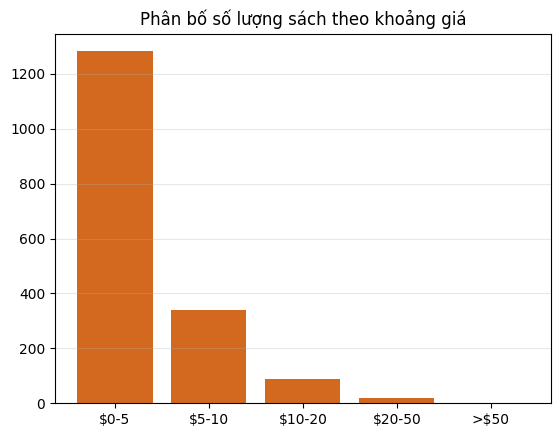

In [28]:
price_ranges = pd.cut(book['current_price'], 
                      bins=[0, 5, 10, 20, 50, 100],
                      labels=['$0-5', '$5-10', '$10-20', '$20-50', '>$50'])

price_dist = book.groupby(price_ranges).agg({
    'product_id': 'count',
    'quantity': 'sum',
    'revenue': 'sum'
}).rename(columns={'product_id': 'Số sách', 'quantity': 'Tổng số lượng', 'revenue': 'Tổng doanh thu'})

price_dist['Tổng doanh thu'] = price_dist['Tổng doanh thu'].map('${:,.2f}'.format)
price_dist['Tổng số lượng'] = price_dist['Tổng số lượng'].astype(int).map('{:,}'.format)

print("PHÂN BỐ GIÁ SÁCH:")
display(price_dist)

chart_data = book.groupby(price_ranges, observed=False).size().reset_index(name='count')
plt.bar(chart_data['current_price'].astype(str), chart_data['count'], color='chocolate')
plt.title('Phân bố số lượng sách theo khoảng giá')
plt.grid(axis='y', alpha=0.3)
plt.show()


1. Sách tập trung ở mức giá nào?
- Nhìn vào cột “Số sách”, ta thấy 1.302 đầu sách nằm trong khoảng giá 0–5 USD, chiếm đa số tuyệt đối.
➡️ Phần lớn sách trên Tiki tập trung ở phân khúc giá rẻ, dưới 5 USD.
2. Sách giá rẻ hay giá cao bán nhiều hơn?
- $0–5 có 3,912,519 lượt bán, cao vượt trội so với các mức khác.
- $20–50 chỉ có 30,557 lượt bán.
- ➡️ Sách giá rẻ bán được nhiều hơn rất nhiều so với sách giá cao.
3. Mục giá nào vừa bán chạy vừa có doanh thu tốt?
- ➡️ Phân khúc $0–5 USD là vừa bán chạy nhất, vừa mang lại doanh thu cao nhất, tức là mức giá vừa phải – dễ tiếp cận – có sức mua lớn.

=>> Thị trường Tiki hiện tập trung chủ yếu ở sách giá rẻ dưới 5 USD, nhóm này vừa có nhiều đầu sách, bán chạy nhất và cũng tạo ra doanh thu lớn nhất. 

Các phân khúc giá cao tuy có giá trị mỗi đơn lớn hơn nhưng không cạnh tranh được về số lượng bán.

### 6. Top 10 tác giả theo doanh thu


TOP 10 TÁC GIẢ CÓ DOANH THU CAO NHẤT:


,authors,revenue
0,Osho,"$2,868,416.06"
1,Unknown,"$955,195.00"
2,Nguyên Phong,"$521,756.92"
3,J. K. Rowling,"$474,161.92"
4,Nguyễn Nhật Ánh,"$422,117.02"
5,William J. O’Neil,"$389,849.60"
6,Phil Town,"$354,818.24"
7,Higashino Keigo,"$267,710.05"
8,John Gray,"$262,794.78"
9,Ngô Sa Thạch,"$234,381.84"


 ⚠️Tác giả Unknown chiếm 4.80% tổng doanh thu.


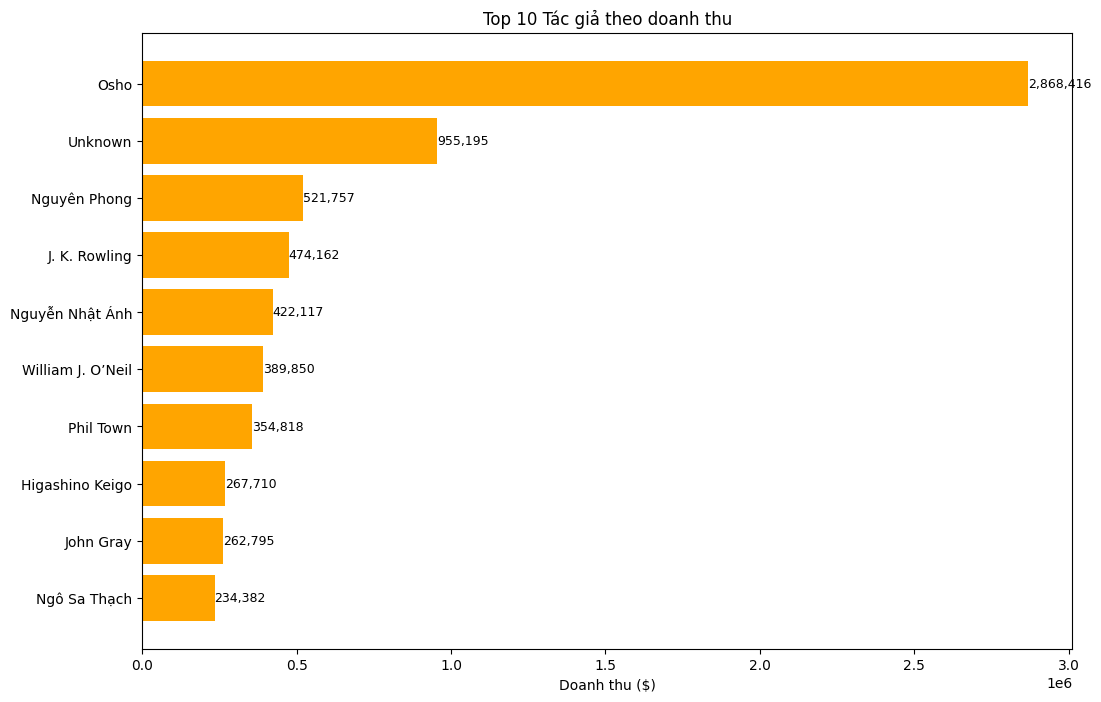

In [29]:
top_10_authors_revenue = book.groupby('authors')['revenue'].sum().reset_index()
top_10_authors_revenue = top_10_authors_revenue.sort_values('revenue', ascending=False).head(10)
top_10_authors_revenue = top_10_authors_revenue.reset_index(drop=True)
top_10_authors_revenue['revenue'] = top_10_authors_revenue['revenue'].map('${:,.2f}'.format)

authors_unknown_revenue = book[book['authors'] == 'Unknown']['revenue'].sum()
total_revenue = book['revenue'].sum()
unknown_percent = (authors_unknown_revenue / total_revenue) * 100

print("TOP 10 TÁC GIẢ CÓ DOANH THU CAO NHẤT:")
display(top_10_authors_revenue)

print(f" ⚠️Tác giả Unknown chiếm {unknown_percent:.2f}% tổng doanh thu.")


# Tạo biểu đồ chart_data cho authors
chart_data = book.groupby('authors')['revenue'].sum().reset_index()
chart_data = chart_data.sort_values('revenue', ascending=False).head(10)

plt.figure(figsize=(12, 8))

plt.barh(chart_data['authors'], chart_data['revenue'], color='orange')
for i, v in enumerate(chart_data['revenue']):
    plt.text(v, i, f'{v:,.0f}', va='center', fontsize=9)
    
plt.title('Top 10 Tác giả theo doanh thu')
plt.xlabel('Doanh thu ($)')
plt.gca().invert_yaxis()
plt.show()

*Note* 
- Giá trị “Unknown” có thể xuất phát từ các đầu sách biên dịch, sách đồng tác giả hoặc do thiếu thông tin.
- Nhóm này vẫn được giữ lại trong phân tích nhằm đảm bảo tính minh bạch và phản ánh chính xác dữ liệu thực tế.

Kết luận 
- Nhìn chung, nhóm “Unknown” tuy không xác định được tác giả cụ thể nhưng vẫn đóng góp đáng kể vào tổng doanh thu, cho thấy khả năng tồn tại của các đầu sách biên dịch hoặc sách đồng tác giả phổ biến trên nền tảng - cần cải thiện dữ liệu để phân tích chính xác hơn
- (Recommendation): Rà soát và bổ sung thông tin tác giả cho các đầu sách gắn nhãn “Unknown”

### 7. Top 10 nhà xuất bản theo doanh thu

TOP 10 NHÀ XUẤT BẢN CÓ DOANH THU CAO NHẤT:


,manufacturer,revenue
0,Unknown,"$5,720,159.15"
1,Nhà Xuất Bản Thế Giới,"$4,057,408.37"
2,Nhà Xuất Bản Văn Hóa - Văn Nghệ TP.HCM,"$2,836,619.75"
3,Nhà Xuất Bản Tổng hợp TP.HCM,"$1,214,777.86"
4,Nhà Xuất Bản Dân Trí,"$865,549.56"
5,Nhà Xuất Bản Hội Nhà Văn,"$706,457.98"
6,Nhà Xuất Bản Thanh Niên,"$660,527.85"
7,NXB Trẻ,"$518,904.19"
8,Nhà Xuất Bản Lao Động,"$512,456.86"
9,Nhà Xuất Bản Hà Nội,"$458,095.63"


 ⚠️Nhà xuất bản Unknown chiếm 28.73% tổng doanh thu.


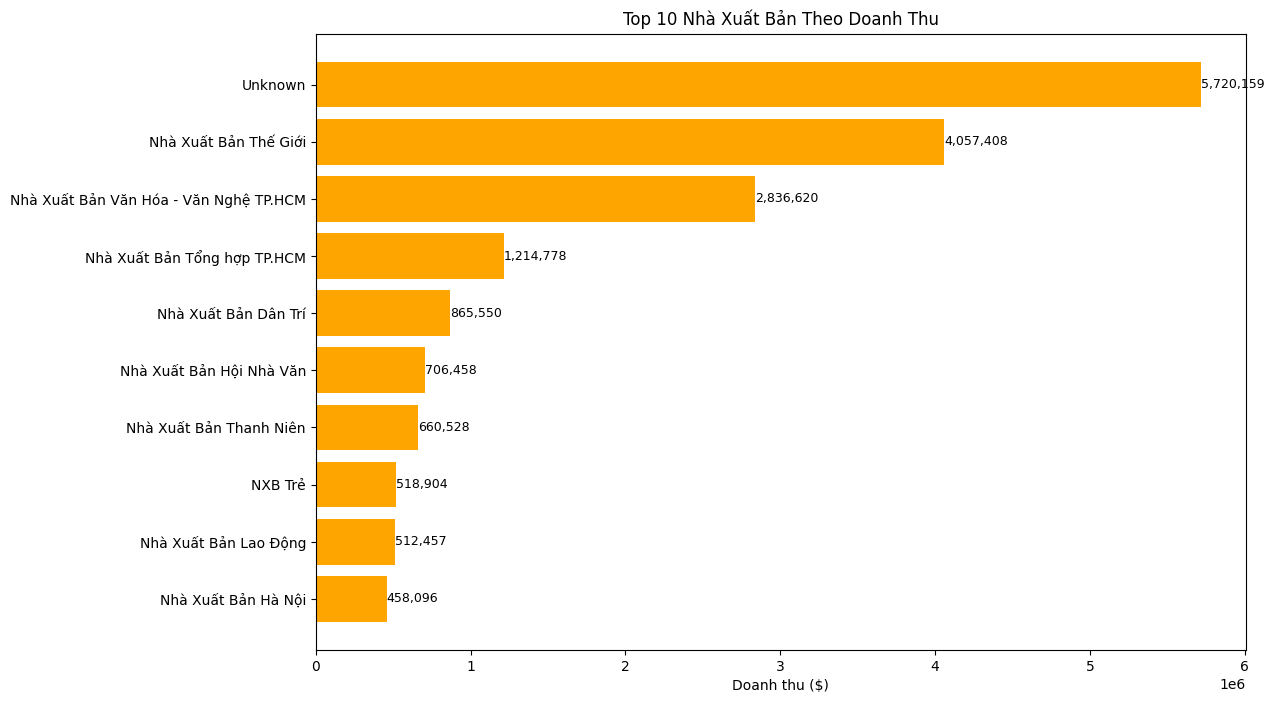

In [30]:
top_10_manufacturers_revenue = book.groupby('manufacturer')['revenue'].sum().reset_index()
top_10_manufacturers_revenue = top_10_manufacturers_revenue.sort_values('revenue', ascending=False).head(10)
top_10_manufacturers_revenue = top_10_manufacturers_revenue.reset_index(drop=True)
top_10_manufacturers_revenue['revenue'] = top_10_manufacturers_revenue['revenue'].map('${:,.2f}'.format)


print("TOP 10 NHÀ XUẤT BẢN CÓ DOANH THU CAO NHẤT:")
display(top_10_manufacturers_revenue) 

manufacturers_unknown_revenue = book[book['manufacturer'] == 'Unknown']['revenue'].sum()
total_revenue = book['revenue'].sum()
unknown_percent = (manufacturers_unknown_revenue / total_revenue) * 100

print(f" ⚠️Nhà xuất bản Unknown chiếm {unknown_percent:.2f}% tổng doanh thu.")

# Tạo biểu đồ chart_data cho manufacturer
chart_data = book.groupby('manufacturer')['revenue'].sum().reset_index()
chart_data = chart_data.sort_values('revenue', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.barh(chart_data['manufacturer'], chart_data['revenue'], color='steelblue')

plt.barh(chart_data['manufacturer'], chart_data['revenue'], color='orange')
for i, v in enumerate(chart_data['revenue']):
    plt.text(v, i, f'{v:,.0f}', va='center', fontsize=9)
    
plt.title('Top 10 Nhà Xuất Bản Theo Doanh Thu')
plt.xlabel('Doanh thu ($)')
plt.gca().invert_yaxis()
plt.show()



*Note*
- Giá trị “Unknown” có thể đến từ các đầu sách chưa ghi rõ thông tin nhà xuất bản trong dữ liệu hoặc do lỗi nhập liệu (data quality issues).
- Tuy nhiên, nhóm này chiếm 28.73% tổng doanh thu nên được sẽ giữ lại trong phân tích để đảm bảo tính minh bạch và phản ánh đúng thực tế của dữ liệu.

Kết luận: 
- Doanh thu tập trung cao vào một số nhà xuất bản lớn như Thế Giới, Văn Hóa – Văn Nghệ TP.HCM và Tổng Hợp TP.HCM giữ vai trò chủ lực trong thị trường sách trên Tiki.
- Nhóm “Unknown” chiếm 28.7% tổng doanh thu, cho thấy dữ liệu còn nhiều đầu sách chưa xác định rõ nguồn xuất bản.
- (Recommendation): Cải thiện chất lượng dữ liệu, Giảm rủi ro tập trung doanh thu

### 8. Phân tích Mối quan hệ giữa Giá và Lượng bán (Price Elasticity)

📊 Hệ số tương quan giữa giá và số lượng bán: -0.0098
➡️ Giá càng cao → Bán càng ít


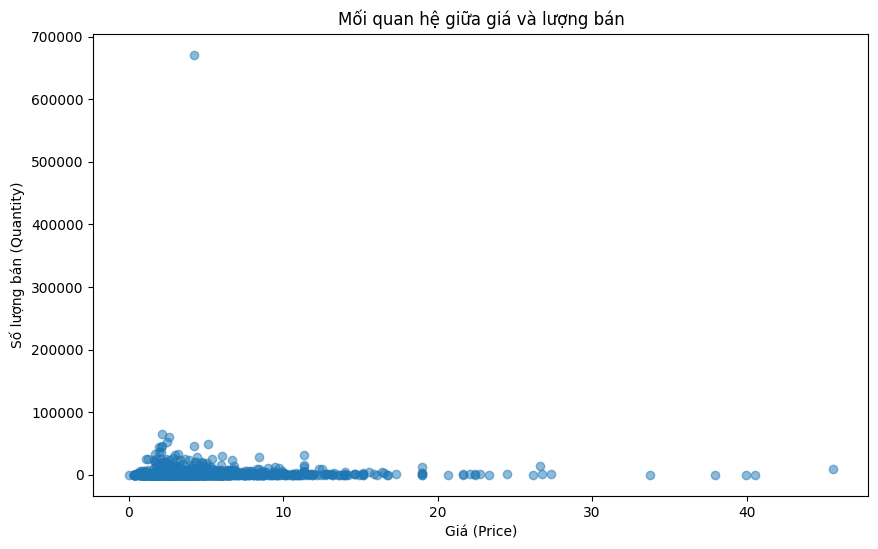

In [31]:
# Tính correlation
correlation = book['current_price'].corr(book['quantity'])
print(f"📊 Hệ số tương quan giữa giá và số lượng bán: {correlation:.4f}")
print(f"➡️ Giá càng cao → Bán càng {'ít' if correlation < 0 else 'nhiều'}")

plt.figure(figsize=(10, 6))
plt.scatter(book['current_price'], book['quantity'], alpha=0.5)
plt.title('Mối quan hệ giữa giá và lượng bán')
plt.xlabel('Giá (Price)')
plt.ylabel('Số lượng bán (Quantity)')
plt.show()

- Correlation âm → Sách giá rẻ bán chạy hơn rất nhiều 
- Phân khúc $0-5 chiếm ưu thế tuyệt đối
- (Recommendation): Tập trung duy trì mức giá cạnh tranh (dưới $5) cho các đầu sách phổ thông

### 9. Xác định nhóm đầu sách mang lại 80% doanh thu (Pareto Analysis)

📊 PHÂN TÍCH PARETO:
→ Tổng số sách: 1,731
→ Số sách chiếm 80% doanh thu: 291 (16.8%)
→ Phần còn lại: 1,440 (83.2%)


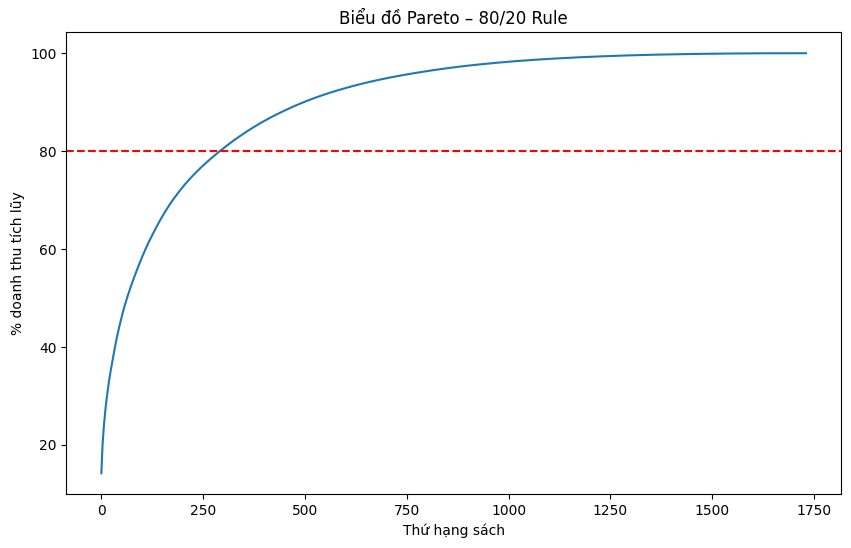

In [32]:
# Sắp xếp theo doanh thu giảm dần
book_pareto = book.sort_values('revenue', ascending=False, ignore_index=True)

# Tính % tích lũy doanh thu
book_pareto['cum_pct'] = book_pareto['revenue'].cumsum() / book_pareto['revenue'].sum() * 100

# Tìm số sách chiếm 80% doanh thu
top_80 = (book_pareto['cum_pct'] <= 80).sum()
total = len(book_pareto)

print("📊 PHÂN TÍCH PARETO:")
print(f"→ Tổng số sách: {total:,}")
print(f"→ Số sách chiếm 80% doanh thu: {top_80:,} ({top_80/total*100:.1f}%)")
print(f"→ Phần còn lại: {total - top_80:,} ({(total - top_80)/total*100:.1f}%)")

plt.figure(figsize=(10, 6))
plt.plot(book_pareto['cum_pct'])
plt.axhline(80, color='r', linestyle='--')
plt.title('Biểu đồ Pareto – 80/20 Rule')
plt.xlabel('Thứ hạng sách')
plt.ylabel('% doanh thu tích lũy')
plt.show()


- Kết quả phân tích Pareto cho thấy: doanh thu tập trung chủ yếu vào nhóm nhỏ sản phẩm. Cụ thể, chỉ 16.4% đầu sách tạo ra 80% tổng doanh thu, trong khi phần lớn (83.6%) đầu sách còn lại đóng góp không đáng kể.
- Kết luận: biểu đồ phản ánh hiệu ứng Long-tail, khi số ít sản phẩm chiếm phần lớn doanh thu. vì đó ta nên ưu tiên quảng bá, giảm giá, hoặc dự báo nhu cầu chính cho nhóm sách top 20%, vì đây là nhóm “bán chạy quyết định doanh thu”.

### 10. Số trang sách càng nhiều thì giá sách có càng cao

In [102]:
correlation_pages_price = book['pages'].corr(book['current_price'])
print("Hệ số tương quan giữa Pages và Current Price:", round(correlation_pages_price, 2))

Hệ số tương quan giữa Pages và Current Price: 0.4


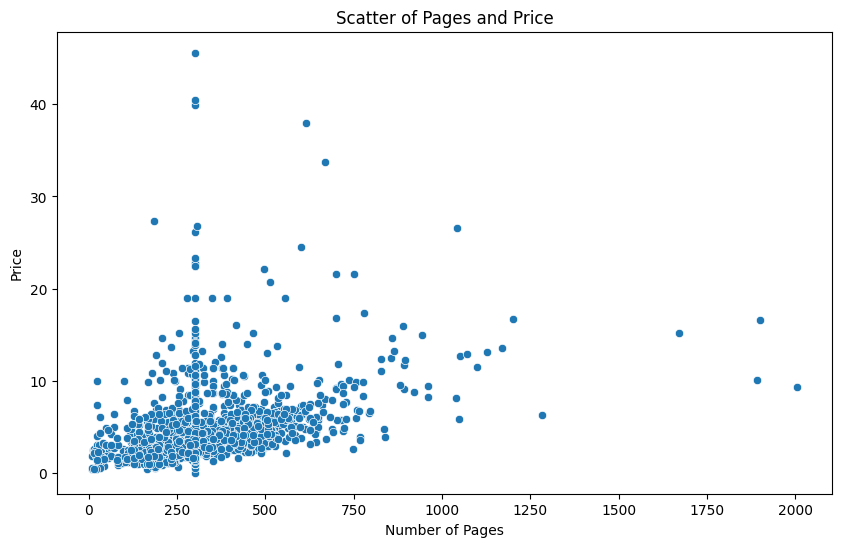

In [101]:
fig = plt.subplots(figsize=(10, 6))

ax=sns.scatterplot(data=book, x='pages', y='current_price')#, color="",color_continuous_scale='RdBu_r')

plt.xlabel('Number of Pages')
plt.ylabel('Price')
plt.title('Scatter of Pages and Price')
plt.show()

- Số trang có ảnh hưởng tích cực đến giá sách (nhiều trang thường giá cao hơn),
nhưng không phải là yếu tố quyết định.
- Giá còn phụ thuộc vào các yếu tố khác nữa,..

## Rating Analyst

### 1. Phân phối Rating

In [42]:
book['avg_rating'].value_counts()

avg_rating
5.0    854
4.8    540
4.7    160
4.6     64
0.0     58
4.5     28
4.3     10
4.0      4
3.8      4
4.2      3
3.9      3
3.7      1
4.1      1
1.0      1
Name: count, dtype: int64

In [40]:
book['avg_rating'].mean()

np.float64(4.703466204506066)

Text(0, 0.5, 'Số lượng sản phẩm')

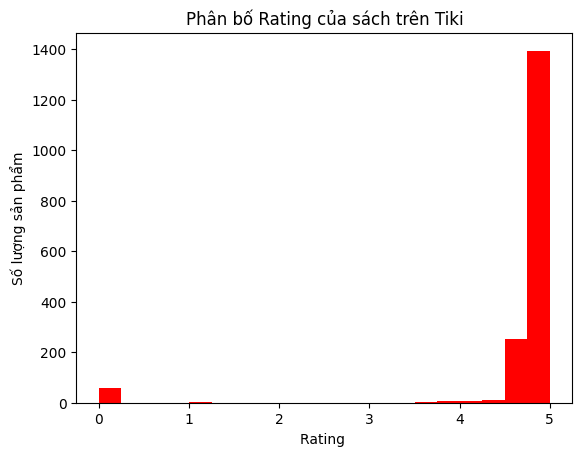

In [74]:
plt.hist(book['avg_rating'], bins=20, color='red')
plt.title("Phân bố Rating của sách trên Tiki")
plt.xlabel("Rating ")
plt.ylabel("Số lượng sản phẩm")

- Đa số sách có rating từ 4.0 – 5.0🌟, cho thấy người mua đánh giá nhìn chung khá tích cực.
- Rating trung bình toàn bộ dataset: 4.7🌟.
- Có 58 đầu sách chưa có đánh giá (0🌟) → nhóm này có khả năng bán kém hoặc mới ra mắt.

=>> Insight rút ra
- Sách có rating cao → khả năng bán tốt, duy trì chất lượng & quảng cáo tập trung sẽ hiệu quả.
- Nhóm không có rating → nên bổ sung chiến dịch kích thích đánh giá

### 2. Mối tương quan giữa rating và lượng bán (Rating vs Quantity)

In [61]:
correlation_rating = book['avg_rating'].corr(book['quantity'])
print("Hệ số tương quan giữa Rating và Quantity:", round(correlation, 2))

Hệ số tương quan giữa Rating và Quantity: -0.01


➡️ Đây là con số gần bằng 0 nghĩa là gần như không có tương quan tuyến tính giữa Rating và Quantity

=>> Insight 🔔
- khách hàng thường đánh giá cao sau khi mua, nhưng rating không phải yếu tố thúc đẩy mua hàng từ đầu.

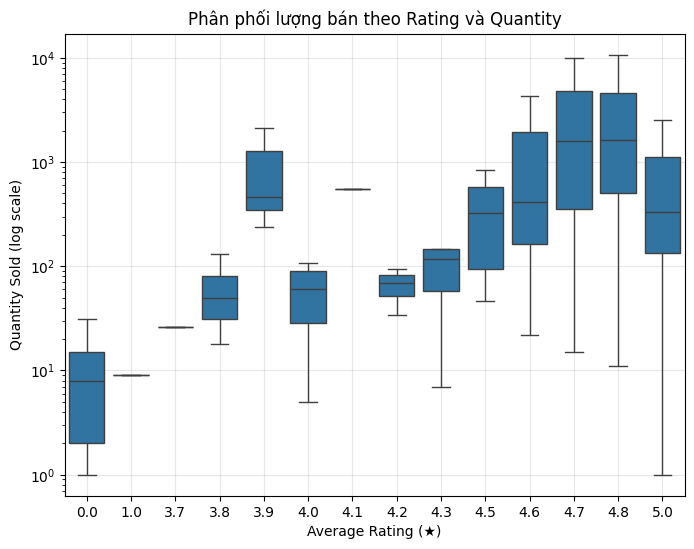

In [58]:
plt.figure(figsize=(8,6))
sns.boxplot(x=book['avg_rating'], y=book['quantity'], showfliers=False)
plt.yscale('log')
plt.xlabel("Average Rating (★)")
plt.ylabel("Quantity Sold (log scale)")
plt.title("Phân phối lượng bán theo Rating và Quantity")
plt.grid(alpha=0.3)
plt.show()

(Thang log): 10⁰ = 1, 10¹ = 10, 10² = 100, 10³ = 1.000, 10⁴ = 10.000

- Những cuốn sách được đánh giá cao thường có chất lượng tốt, nhưng không phải cuốn nào cũng bán chạy.
- Vì để bán chạy còn phụ thuộc vào khuyến mãi, tác giả nổi tiếng, thể loại hot, quảng cáo,…
- Nhưng những cuốn sách bán chạy nhất thì gần như đều có đánh giá cao.

### 3. Mối quan hệ giữa số lượng review và số lượng bán (Review vs Quantity)

Hệ số tương quan giữa Review và Quantity: 0.32


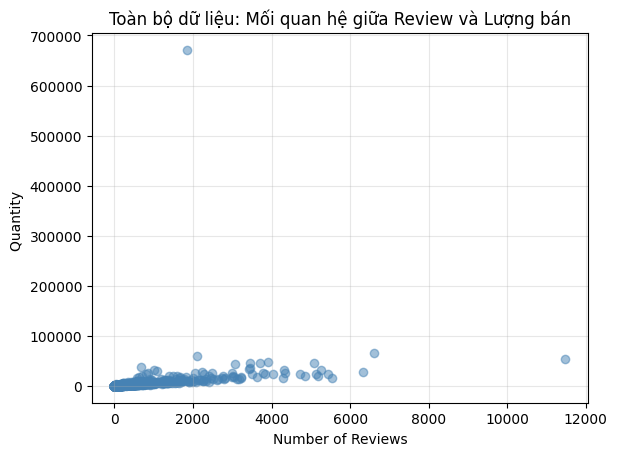

➡️ Biểu đồ này thể hiện toàn bộ dữ liệu. Một vài sản phẩm có lượng bán cực cao (best-seller) Điều này kéo giãn trục Quantity khiến phần lớn điểm dữ liệu bị gom vào góc dưới. Tuy nhiên đây là giá trị thật, không phải lỗi.


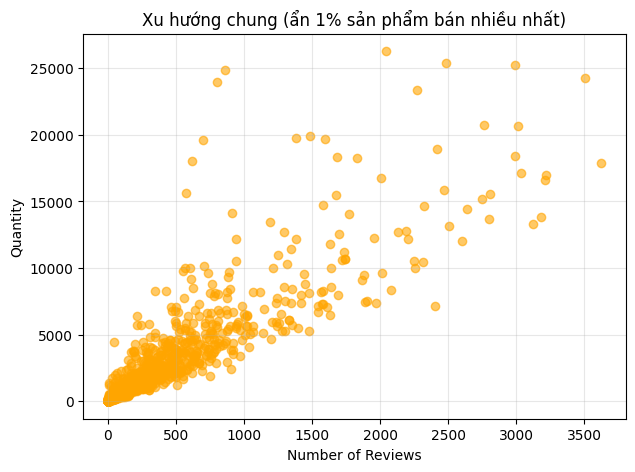

➡️ Biểu đồ này là sau khi loại nhóm 1% sản phẩm bán chạy nhất, xu hướng chung trở nên rõ ràng hơn=>> số lượng review càng nhiều thì số lượng bán có xu hướng tăng theo.


In [64]:
correlation_review = book['n_review'].corr(book['quantity'])
print("Hệ số tương quan giữa Review và Quantity:", round(correlation_review, 2))

# --- Biểu đồ 1: Toàn bộ dữ liệu ---
plt.scatter(book['n_review'], book['quantity'], alpha=0.5, color='steelblue')
plt.xlabel('Number of Reviews')
plt.ylabel('Quantity ')
plt.title('Toàn bộ dữ liệu: Mối quan hệ giữa Review và Lượng bán')
plt.grid(alpha=0.3)
plt.show()
print("➡️ Biểu đồ này thể hiện toàn bộ dữ liệu. Một vài sản phẩm có lượng bán cực cao (best-seller) "
      "Điều này kéo giãn trục Quantity khiến phần lớn điểm dữ liệu bị gom vào góc dưới. Tuy nhiên đây là giá trị thật, không phải lỗi.")

# --- Biểu đồ 2: Ẩn top 1% sản phẩm bán nhiều nhất ---
upper_review = book['n_review'].quantile(0.99)
upper_quantity = book['quantity'].quantile(0.99)

book_trim = book[(book['n_review'] <= upper_review) & (book['quantity'] <= upper_quantity)]

plt.figure(figsize=(7,5))
plt.scatter(book_trim['n_review'], book_trim['quantity'], alpha=0.6, color='orange')
plt.xlabel('Number of Reviews')
plt.ylabel('Quantity')
plt.title('Xu hướng chung (ẩn 1% sản phẩm bán nhiều nhất)')
plt.grid(alpha=0.3)
plt.show()
print("➡️ Biểu đồ này là sau khi loại nhóm 1% sản phẩm bán chạy nhất, xu hướng chung trở nên rõ ràng hơn=>> số lượng review càng nhiều thì số lượng bán có xu hướng tăng theo.")


💡 Insight
- Review là 1 trong những yếu tố quan trọng giúp sản phẩm bán chạy hơn nhưng ta vẫn còn phải xem xét thêm các yếu tô khác 

### Tổng kết Rating Analysis:

- Hầu hết sách trên Tiki được đánh giá rất cao (4–5⭐), thể hiện khách hàng nhìn chung hài lòng với chất lượng sản phẩm. Tuy nhiên, rating cao không đảm bảo sách bán chạy; doanh số còn chịu ảnh hưởng bởi các yếu tố như giá, khuyến mãi, tác giả nổi tiếng,..
- Dù vậy, các đầu sách bán chạy nhất đều có rating và số lượng review cao — cho thấy rating và review đóng vai trò quan trọng trong việc tạo ra các sản phẩm bán chạy.

Recommendation 

- 1️⃣ Tăng số lượng review
- 2️⃣ Ưu tiên marketing cho sách rating cao nhưng bán thấp
- 3️⃣ Tập trung kích hoạt rating cho sách chưa có đánh giá (0⭐)

## Discount Analysis

### 1. Phân bố Discount

In [67]:
book['discount'].value_counts()

discount
0.40    252
0.30    188
0.00    151
0.34     87
0.33     73
0.20     72
0.28     57
0.35     54
0.13     53
0.26     50
0.36     49
0.29     40
0.15     40
0.37     36
0.39     36
0.27     35
0.25     34
0.32     28
0.05     25
0.45     25
0.43     25
0.10     23
0.31     22
0.21     22
0.24     22
0.22     22
0.50     19
0.23     18
0.38     18
0.19     17
0.60     16
0.03     13
0.14     12
0.42     12
0.18      9
0.16      8
0.07      8
0.41      7
0.44      6
0.11      5
0.09      5
0.17      4
0.06      4
0.48      4
0.12      3
0.80      3
0.53      3
0.02      3
0.01      2
0.47      2
0.08      2
0.04      2
0.52      1
0.56      1
0.62      1
0.58      1
Name: count, dtype: int64

In [68]:
book['discount'].mean()

np.float64(0.2761618497109827)

Text(0, 0.5, 'Số lượng sản phẩm')

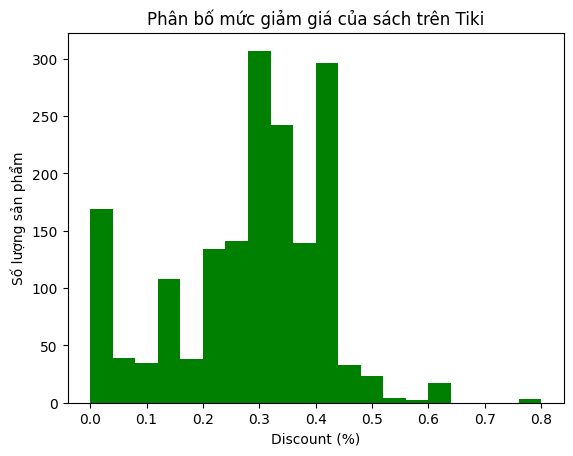

In [71]:
plt.hist(book['discount'], bins = 20, color='green')
plt.title("Phân bố mức giảm giá của sách trên Tiki")
plt.xlabel("Discount (%)")
plt.ylabel("Số lượng sản phẩm")

- Mức discount phổ biến nhất nằm trong khoảng 30% – 40%.
- Discount trung bình toàn bộ dataset: ~27%.
- Một số sách không giảm giá hoặc giảm rất thấp → có thể là sách mới ra hoặc bán tốt không cần khuyến mãi.
- Giảm giá >50% xuất hiện rất ít → chủ yếu là xả kho / khuyến mãi mạnh ngắn hạn.


### 2. Mối tương quan giữa Discount và Quantity

In [75]:
correlation_discount = book['discount'].corr(book['quantity'])
print("Hệ số tương quan giữa Discount và Quantity:", round(correlation_discount, 2))

Hệ số tương quan giữa Discount và Quantity: 0.05


➡️ Hệ số 0.05 gần bằng 0 → Giảm giá có thể tăng doanh số rất nhẹ, nhưng tác động quá yếu → không thể xem là yếu tố quyết định.

=>> Discount không phải yếu tố quyết định doanh số.

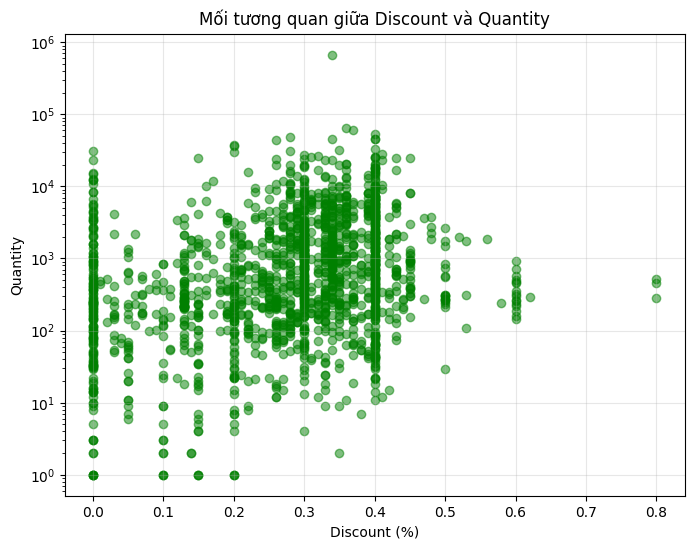

In [78]:
plt.figure(figsize=(8,6))
plt.scatter(book['discount'], book['quantity'], alpha=0.5, color = 'green')
plt.xlabel("Discount (%)")
plt.ylabel("Quantity")
plt.yscale('log')
plt.title("Mối tương quan giữa Discount và Quantity")
plt.grid(alpha=0.3)
plt.show()

(Thang log): 10⁰ = 1, 10¹ = 10, 10² = 100, 10³ = 1.000, 10⁴ = 10.000, 10⁵ = 100.000, 10⁶ = 1.000.000


- Biểu đồ scatter cho thấy ở mọi mức giảm giá (0% → 80%) đều có cả sách bán chạy và sách bán kém, không có xu hướng tăng doanh số theo discount

=>> Giảm giá không phải là đòn bẩy doanh số chính

### 3. Mức giảm giá tối ưu cho doanh thu 

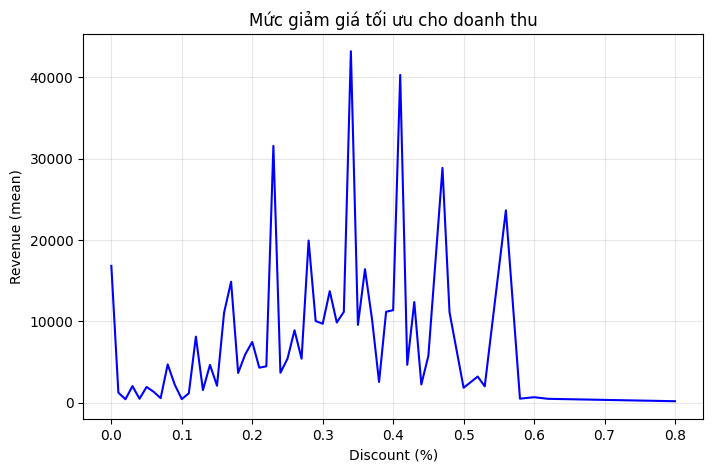

In [90]:
discount_revenue = book.groupby('discount')['revenue'].mean().reset_index()


discount_revenue = discount_revenue.sort_values(by='discount')

plt.figure(figsize=(8,5))
plt.plot(discount_revenue['discount'], discount_revenue['revenue'], color='blue')
plt.xlabel("Discount (%)")
plt.ylabel("Revenue (mean)")
plt.title("Mức giảm giá tối ưu cho doanh thu")
plt.grid(alpha=0.3)
plt.show()


Giảm giá khoảng 25–40% là mức tối ưu để tối đa hóa doanh thu.

### Tổng kết Discount Analysis

- Discount trung bình: ~27%, phổ biến nhất trong khoảng 30-40%
- Hệ số tương quan Discount vs Quantity: 0.05 (gần như không có tương quan)
- Biểu đồ scatter cho thấy: ở mọi mức giảm giá đều có cả sách bán chạy và bán kém
- **Nghịch lý**: Sách giảm giá 0-20% có doanh thu TB/sách cao nhất, trong khi giảm >50% có doanh thu thấp nhất

**Recommendation🔥**
- Ưu tiên mức giảm 25–40% trong các chiến dịch marketing.
- Không nên giảm giá quá sâu
- **Sách chất lượng cao / Bestseller**: 
  - Nên giữ giá hoặc giảm nhẹ 15–20% để tối đa lợi nhuận.
- **Sách bán trung bình**:
  - Nên giảm 25–40% để thúc đẩy chuyển đổi mua hàng.
- **Sách ế ẩm / Xả kho**:
  - Giảm 40-60% để thanh lý nhanh thu hồi vốn, không kỳ vọng lợi nhuận cao


##  Relationship Analysis

### 1. Top yếu tố dự đoán doanh thu mạnh nhất (Predictive insight)

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Chọn biến đầu vào + đích
X = book[['current_price', 'discount', 'avg_rating', 'n_review', 'pages', 'quantity']]
y = book['revenue']

# Tách train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train mô hình
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Lấy độ quan trọng của biến
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance.sort_values(by='Importance', ascending=False)


,Feature,Importance
5,quantity,0.793081
0,current_price,0.176841
3,n_review,0.015989
4,pages,0.009260
2,avg_rating,0.003488
1,discount,0.001341
